<a href="https://colab.research.google.com/github/Ashish-1521/ML-HW/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# reading the file
_data = pd.read_csv("/content/sample_data/train.csv")

# Removing unwanted or columns that provide much info
unwanted_Col = ["Name","Cabin","Ticket"]
_data = _data.drop(unwanted_Col,axis=1)

# Removing NA/null values from columns
_data = _data.dropna()

# Tranforming sex, Embark and Pclass to columns for more information and detailing
new_col = ["Pclass","Sex","Embarked"]
new_data = []
# get_dummies converts the values of column to a set of columns or class of different values.
for c in new_col:
  new_data.append(pd.get_dummies(_data[c]))
new_data = pd.concat(new_data,axis=1) # since the data is in list format we concat the data with a null values for easy conversion
_data = pd.concat((_data,new_data),axis=1)

# Dropping redundant and unwanted columns
unwanted_col = ["Pclass","Sex","Embarked","Parch","SibSp"]
_data = _data.drop(unwanted_col,axis=1)

# Use interpolate function to fill all the missing values in the age. Interpolate fills the missing values with the median value
_data["Age"] = _data["Age"].interpolate()
print(_data)

     PassengerId  Survived   Age     Fare  1  2  3  female  male  C  Q  S
0              1         0  22.0   7.2500  0  0  1       0     1  0  0  1
1              2         1  38.0  71.2833  1  0  0       1     0  1  0  0
2              3         1  26.0   7.9250  0  0  1       1     0  0  0  1
3              4         1  35.0  53.1000  1  0  0       1     0  0  0  1
4              5         0  35.0   8.0500  0  0  1       0     1  0  0  1
..           ...       ...   ...      ... .. .. ..     ...   ... .. .. ..
885          886         0  39.0  29.1250  0  0  1       1     0  0  1  0
886          887         0  27.0  13.0000  0  1  0       0     1  0  0  1
887          888         1  19.0  30.0000  1  0  0       1     0  0  0  1
889          890         1  26.0  30.0000  1  0  0       0     1  1  0  0
890          891         0  32.0   7.7500  0  0  1       0     1  0  1  0

[712 rows x 12 columns]


Accuracy : 0.7616822429906542


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.486\nsamples = 498\nvalue = [291, 207]\nclass = Survived'),
 Text(0.25, 0.625, 'x[5] <= 0.5\ngini = 0.356\nsamples = 181\nvalue = [42, 139]\nclass = Not Survived'),
 Text(0.125, 0.375, 'x[1] <= 2.5\ngini = 0.101\nsamples = 112\nvalue = [6, 106]\nclass = Not Survived'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.087\nsamples = 110\nvalue = [5, 105]\nclass = Not Survived'),
 Text(0.375, 0.375, 'x[2] <= 24.212\ngini = 0.499\nsamples = 69\nvalue = [36, 33]\nclass = Survived'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 58\nvalue = [25, 33]\nclass = Not Survived'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Survived'),
 Text(0.75, 0.625, 'x[3] <= 0.5\ngini = 0.337\nsamples = 317\nvalue = [249, 68]\nclass = Survived'),
 Text(0.625, 0.375, 'x[1] <= 6.5\ngini = 0.262\nsamples = 251\nvalue = [212, 39]\nclass = Survived'),
 Text(0.5625, 0.125, 'gini = 0.

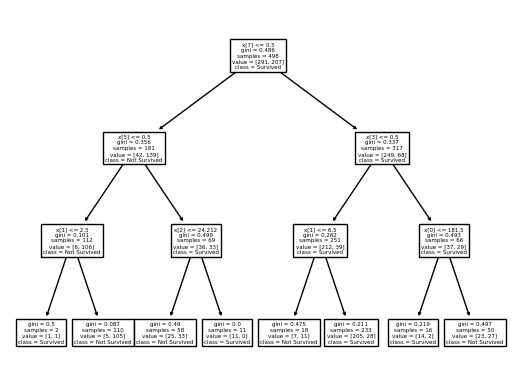

In [145]:
from sklearn.metrics import accuracy_score
X = _data.values
Y = _data["Survived"].values

# X still has survived column values removing the column
X = np.delete(X,1,axis=1)

X_train, X_test, Y_train, Y_real = train_test_split(X,Y,test_size=0.3)

# Using Decision tree classifier for decision tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,Y_train)
# print(clf.score)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_real,y_pred)
print("Accuracy :",accuracy)
tree.plot_tree(clf,class_names = ['Survived','Not Survived'])

In [151]:
# For 5 fold cross validation we divide the dataset into 5 parts and each time we choose the 4 parts as training set and the remaining as testset
cv = ShuffleSplit(n_splits=5, test_size=0.3)
cross_Validation_scores = cross_val_score(clf,X_train,Y_train,cv=cv)
print(cross_Validation_scores.mean())


0.792


In [153]:
model_rf = RandomForestClassifier()
model_rf = clf.fit(X_train,Y_train)
y_pred_forest = model_rf.predict(X_test)
y_pred_forest
accuracy_forest = model_rf.score(X_test,Y_real)
accuracy_forest

0.7616822429906542

In [170]:
from sklearn.ensemble import BaggingClassifier
classification_1 = tree.DecisionTreeClassifier(max_depth=3)
bagging_classifier = BaggingClassifier(estimator=classification_1,n_estimators=100,random_state=1)
bagging_classifier.fit(X_train,Y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy_score(Y_real, y_pred)

0.8084112149532711

In [168]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
adaBoost.fit(X_train,Y_train)
y_pred = adaBoost.predict(X_test)
accuracy_score(Y_real, y_pred)

0.7663551401869159